# Lesson 3: Variables, Groups, and Data Sets

In prior lessons and exercises, we worked with variables like median household income, `B19013_001E`.
But where do those variables come from and how did we know they existed? That is what this lesson is
about.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Imports

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS5, DECENNIAL_PUBLIC_LAW_94_171, CBP

import pandas as pd

from matplotlib.ticker import FuncFormatter

In [2]:
# Some columns will be wide and we want to see their full contents.
pd.set_option("max_colwidth", 200)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## U.S. Census Data Model

1. Data is organized in *data sets* like the ACS and the Decenial Public Law data sets.
2. Most data sets consist of *groups* of variables relating to a topic.
3. Variables within groups can be organized into *trees* of hierarchical variables.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Data sets come in all different shapes and sizes

### The ACS5 has 1,140 group and 27,889 variables

There is a reason this data set is so popular. It has all kinds of different
social, racial, ethnic, and economic data about individuals and groups.

In [3]:
ced.variables.search_groups(ACS5, 2020)

,DATASET,YEAR,GROUP,DESCRIPTION
0,acs/acs5,2020,B01001,SEX BY AGE
1,acs/acs5,2020,B01001A,SEX BY AGE (WHITE ALONE)
2,acs/acs5,2020,B01001B,SEX BY AGE (BLACK OR AFRICAN AMERICAN ALONE)
3,acs/acs5,2020,B01001C,SEX BY AGE (AMERICAN INDIAN AND ALASKA NATIVE ALONE)
4,acs/acs5,2020,B01001D,SEX BY AGE (ASIAN ALONE)
...,...,...,...,...
1135,acs/acs5,2020,C27014,PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE
1136,acs/acs5,2020,C27016,HEALTH INSURANCE COVERAGE STATUS BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE
1137,acs/acs5,2020,C27017,PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE
1138,acs/acs5,2020,C27018,PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE


In [4]:
ced.variables.search(ACS5, 2020)

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,N/A,AIANHH,Geography,NaN,None
1,2020,acs/acs5,N/A,AIARO,Geography,NaN,None
2,2020,acs/acs5,N/A,AIHHTL,Geography,NaN,None
3,2020,acs/acs5,N/A,AIRES,Geography,NaN,None
4,2020,acs/acs5,N/A,ANRC,Geography,NaN,None
...,...,...,...,...,...,...,...
27884,2020,acs/acs5,N/A,TRACT,Geography,NaN,None
27885,2020,acs/acs5,N/A,TRISUBREM,Geography,NaN,None
27886,2020,acs/acs5,N/A,TTRACT,Geography,NaN,None
27887,2020,acs/acs5,N/A,UA,Geography,NaN,None


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### The decennial public law data set is much smaller

This is a narrowly focused data set designed specifically to help states
manage congressional district boundaries.

It contains only 6 groups and a total of 335 variables.

In [5]:
ced.variables.search_groups(DECENNIAL_PUBLIC_LAW_94_171, 2020)

,DATASET,YEAR,GROUP,DESCRIPTION
0,dec/pl,2020,H1,OCCUPANCY STATUS
1,dec/pl,2020,P1,RACE
2,dec/pl,2020,P2,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE"
3,dec/pl,2020,P3,RACE FOR THE POPULATION 18 YEARS AND OVER
4,dec/pl,2020,P4,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE FOR THE POPULATION 18 YEARS AND OVER"
5,dec/pl,2020,P5,GROUP QUARTERS POPULATION BY MAJOR GROUP QUARTERS TYPE


In [6]:
ced.variables.search(DECENNIAL_PUBLIC_LAW_94_171, 2020)

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,dec/pl,N/A,AIANHH,Geography,NaN,None
1,2020,dec/pl,N/A,AIHHTL,Geography,NaN,None
2,2020,dec/pl,N/A,AIRES,Geography,NaN,None
3,2020,dec/pl,N/A,ANRC,Geography,NaN,None
4,2020,dec/pl,N/A,BLKGRP,Geography,NaN,None
...,...,...,...,...,...,...,...
330,2020,dec/pl,N/A,SUBMCD,Geography,NaN,None
331,2020,dec/pl,N/A,SUMLEVEL,Summary Level code,NaN,None
332,2020,dec/pl,N/A,TRACT,Geography,NaN,None
333,2020,dec/pl,N/A,TRISUBREM,Geography,NaN,None


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### The county business patterns (CBP) data set has a very narrow focus

It has a single group with just 25 variables. But they encode some tremendously
important data about business activity at the county level.

In [7]:
ced.variables.search_groups(CBP, 2020)

,DATASET,YEAR,GROUP,DESCRIPTION
0,cbp,2020,CB2000CBP,"All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2020"


In [8]:
ced.variables.search(CBP, 2020)

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,cbp,N/A,CBSA,Geography,NaN,None
1,2020,cbp,N/A,CD,Geography,NaN,None
2,2020,cbp,N/A,COUNTY,Geography,NaN,None
3,2020,cbp,N/A,CSA,Geography,NaN,None
4,2020,cbp,CB2000CBP,EMP,Number of employees,NaN,None
5,2020,cbp,CB2000CBP,EMPSZES,Employment size of establishments code,NaN,None
6,2020,cbp,CB2000CBP,EMP_N,Noise range for number of employees,NaN,None
7,2020,cbp,CB2000CBP,ESTAB,Number of establishments,NaN,None
8,2020,cbp,N/A,GEOCOMP,GEO_ID Component,NaN,None
9,2020,cbp,CB2000CBP,GEO_ID,Geographic identifier code,NaN,None


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### There are many more data sets

In 2020 alone, there are 57 data sets. Note that there are fewer than there would have been, as some, like `ACS1` were not published in 2020 due to COVID-19.

In [9]:
ced.variables.search_data_sets(vintage=2020)

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
0,2020,ABS_CB,abscb,Economic Surveys: Annual Business Survey: Characteristics of Businesses,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, ...",http://api.census.gov/data/2020/abscb
1,2020,ABS_CBO,abscbo,Economic Surveys: Annual Business Survey: Characteristics of Business Owners,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, ...",http://api.census.gov/data/2020/abscbo
2,2020,ABS_CS,abscs,Economic Surveys: Annual Business Survey: Company Summary,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, ...",http://api.census.gov/data/2020/abscs
3,2020,ABS_MCB,absmcb,Economic Surveys: Annual Business Survey: Module Characteristics of Businesses,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, ...",http://api.census.gov/data/2020/absmcb
4,2020,ABS_NESD,absnesd,Economic Surveys: Nonemployer Statistics by Demographics: Company Summary,"The Nonemployer Statistics by Demographics (NES-D): Company Summary estimates provide economic data classified by sex, ethnicity, race, and veteran status of nonemployer firms. The NES-D is not a ...",http://api.census.gov/data/2020/absnesd
5,2020,ABS_NESDO,absnesdo,Economic Surveys: Nonemployer Statistics by Demographics: Characteristics of Business Owners,The Nonemployer Statistics by Demographics (NES-D): Characteristics of Business Owners estimates provide information on selected economic and demographic characteristics of business owners tabulat...,http://api.census.gov/data/2020/absnesdo
6,2020,ACS5,acs/acs5,American Community Survey: 5-Year Estimates: Detailed Tables 5-Year,The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a br...,http://api.census.gov/data/2020/acs/acs5
7,2020,ACS5_CPROFILE,acs/acs5/cprofile,American Community Survey: 5-Year Estimates: Comparison Profiles 5-Year,The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a br...,http://api.census.gov/data/2020/acs/acs5/cprofile
8,2020,ACS5_PROFILE,acs/acs5/profile,American Community Survey: 5-Year Estimates: Data Profiles 5-Year,The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a br...,http://api.census.gov/data/2020/acs/acs5/profile
9,2020,ACS5_PUMS,acs/acs5/pums,2020 American Community Survey: 5-Year Estimates - Public Use Microdata Sample,"The American Community Survey (ACS) Public Use Microdata Sample (PUMS) contains a sample of responses to the ACS. The ACS PUMS dataset includes variables for nearly every question on the survey, a...",http://api.census.gov/data/2020/acs/acs5/pums


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Overall there are many more

As of now, there are over 1,600 data sets. More are added on a regular basis.

In [10]:
ced.variables.search_data_sets()

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
0,1986,CBP,cbp,1986 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment...",http://api.census.gov/data/1986/cbp
1,1987,CBP,cbp,1987 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment...",http://api.census.gov/data/1987/cbp
2,1988,CBP,cbp,1988 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment...",http://api.census.gov/data/1988/cbp
3,1989,CBP,cbp,1989 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment...",http://api.census.gov/data/1989/cbp
4,1989,CPS_BASIC_APR,cps/basic/apr,Apr 1989 Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployment, and other characteristics of the general labor force, of the population as a whole, and of various subgroups of the population. Monthly labor forc...",http://api.census.gov/data/1989/cps/basic/apr
...,...,...,...,...,...,...
1606,timeseries,TIMESERIES_PSEO,timeseries/pseo/flows,Post-Secondary Employment Outcomes (PSEO): Post-Secondary Employment Outcomes (PSEO) - Flows,Post-Secondary Employment Outcomes (PSEO) are experimental tabulations developed by researchers at the U.S. Census Bureau. PSEO data provide earnings and employment outcomes for college and univer...,http://api.census.gov/data/timeseries/pseo/flows
1607,timeseries,None,timeseries/qwi/rh,Time Series Longitudinal Employer-Household Dynamics - QWI: Race by Ethnicity,"The Quarterly Workforce Indicators (QWI) are a set of economic indicators including employment, job creation, earnings, and other measures of employment flows. The QWI are reported using detailed ...",http://api.census.gov/data/timeseries/qwi/rh
1608,timeseries,None,timeseries/qwi/sa,Time Series Longitudinal Employer-Household Dynamics - QWI: Sex by Age,"The Quarterly Workforce Indicators (QWI) are a set of economic indicators including employment, job creation, earnings, and other measures of employment flows. The QWI are reported using detailed ...",http://api.census.gov/data/timeseries/qwi/sa
1609,timeseries,TIMESERIES_QWI,timeseries/qwi/se,Time Series Longitudinal Employer-Household Dynamics - QWI: Sex by Education,"The Quarterly Workforce Indicators (QWI) are a set of economic indicators including employment, job creation, earnings, and other measures of employment flows. The QWI are reported using detailed ...",http://api.census.gov/data/timeseries/qwi/se


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## How do we find the variables we are actually looking for?

We just saw `ced.variables.search` in action, and we will use it again.

## Hypothetical research question: 

What fraction of the population of King County, WA lived in owner-occupied homes in 2022,
by census tract?

- We will start our search for variables in the ACS5, since it has so many variables.
- We will search for variables whose name contains 'owner-occupied' or similar strings.

In [11]:
# This is a regular expression.

# We're not sure if we are looking for `owner-occupied` or `owner occupied`,
# so let's use a `.` to match any character. And the `$` at the end means
# this should be at the end of the name.
owner_occupied_pattern = r"owner.occupied$"

In [12]:
ced.variables.search(ACS5, 2022, pattern=owner_occupied_pattern)

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2022,acs/acs5,B17019,B17019_004E,Estimate!!Total:!!Income in the past 12 months below poverty level:!!Married-couple family:!!Owner occupied,NaN,None
1,2022,acs/acs5,B17019,B17019_008E,"Estimate!!Total:!!Income in the past 12 months below poverty level:!!Other families:!!Male householder, no spouse present:!!Owner occupied",NaN,None
2,2022,acs/acs5,B17019,B17019_011E,"Estimate!!Total:!!Income in the past 12 months below poverty level:!!Other families:!!Female householder, no spouse present:!!Owner occupied",NaN,None
3,2022,acs/acs5,B17019,B17019_015E,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Married-couple family:!!Owner occupied,NaN,None
4,2022,acs/acs5,B17019,B17019_019E,"Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Other families:!!Male householder, no spouse present:!!Owner occupied",NaN,None
5,2022,acs/acs5,B17019,B17019_022E,"Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Other families:!!Female householder, no spouse present:!!Owner occupied",NaN,None
6,2022,acs/acs5,B25003A,B25003A_002E,Estimate!!Total:!!Owner occupied,NaN,None
7,2022,acs/acs5,B25003B,B25003B_002E,Estimate!!Total:!!Owner occupied,NaN,None
8,2022,acs/acs5,B25003C,B25003C_002E,Estimate!!Total:!!Owner occupied,NaN,None
9,2022,acs/acs5,B25003D,B25003D_002E,Estimate!!Total:!!Owner occupied,NaN,None


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### The most interesting look like they are in groups `B25003` and `B25008`

Let's explore these further. First we will look at what these groups are about.

In [13]:
# Notice the regular expression to match both groups.
ced.variables.search_groups(ACS5, 2022, pattern=r"^B2500[38]$")

,DATASET,YEAR,GROUP,DESCRIPTION
0,acs/acs5,2022,B25003,Tenure
1,acs/acs5,2022,B25008,Total Population in Occupied Housing Units by Tenure


`B25008` tracts total population, so let's use that.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Variables within a group

In [14]:
GROUP = "B25008"

In [15]:
ced.variables.search(ACS5, 2022, group_name=GROUP)

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2022,acs/acs5,B25008,B25008_001E,Estimate!!Total:,NaN,None
1,2022,acs/acs5,B25008,B25008_002E,Estimate!!Total:!!Owner occupied,NaN,None
2,2022,acs/acs5,B25008,B25008_003E,Estimate!!Total:!!Renter occupied,NaN,None
3,2022,acs/acs5,B25008,GEO_ID,Geography,NaN,None
4,2022,acs/acs5,B25008,NAME,Geographic Area Name,NaN,None


### As a tree

In many groups the variables exist in a tree, implied by the use of `:` and `!` characters in their
labels. It is easier to understand the tree by looking at it directly.

In [16]:
ced.variables.group_tree(ACS5, 2022, group_name=GROUP)

+ Estimate
    + Total: (B25008_001E)
        + Owner occupied (B25008_002E)
        + Renter occupied (B25008_003E)
+ Geography (GEO_ID)
+ Geographic Area Name (NAME)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Now we can do the query

Using techniques we learned in lesson 2.

In [17]:
from censusdis.states import WA
from censusdis.counties.washington import KING

In [23]:
gdf_king = ced.download(
    ACS5,
    2020,
    # Instead of listing the variables, we can ask for a whole group.
    group=GROUP,
    state=WA,
    county=KING,
    tract="*",
    with_geometry=True,
    # An optional flag that produces better maps in coastal areas.
    # More on this in the next lesson.
    remove_water=True,
)

In [19]:
gdf_king

,STATE,COUNTY,TRACT,B25008_001E,B25008_002E,B25008_003E,GEO_ID,NAME,geometry
0,53,033,029405,5704,5109,595,1400000US53033029405,"Census Tract 294.05, King County, Washington","POLYGON ((-122.18678 47.40861, -122.18676 47.41220, -122.18675 47.41583, -122.18131 47.41583, -122.17603 47.41583, -122.17505 47.41581, -122.17106 47.41584, -122.16656 47.41586, -122.16524 47.4158..."
1,53,033,029406,4720,3716,1004,1400000US53033029406,"Census Tract 294.06, King County, Washington","POLYGON ((-122.18678 47.39501, -122.18677 47.39771, -122.18677 47.40090, -122.18678 47.40130, -122.18678 47.40218, -122.18678 47.40272, -122.18115 47.40167, -122.17605 47.40281, -122.17453 47.4027..."
2,53,033,029407,4674,2032,2642,1400000US53033029407,"Census Tract 294.07, King County, Washington","POLYGON ((-122.20742 47.39061, -122.20742 47.39418, -122.20739 47.39966, -122.20739 47.40076, -122.20738 47.40148, -122.20524 47.40148, -122.19988 47.40118, -122.19875 47.40171, -122.19769 47.4013..."
3,53,033,029408,4535,1954,2581,1400000US53033029408,"Census Tract 294.08, King County, Washington","POLYGON ((-122.19875 47.40171, -122.19740 47.40285, -122.19528 47.40265, -122.19406 47.40226, -122.18678 47.40218, -122.18678 47.40130, -122.18677 47.40090, -122.18677 47.39771, -122.18678 47.3950..."
4,53,033,029504,6002,1632,4370,1400000US53033029504,"Census Tract 295.04, King County, Washington","POLYGON ((-122.20235 47.37974, -122.20230 47.38334, -122.20223 47.38696, -122.19710 47.38695, -122.19196 47.38694, -122.18679 47.38692, -122.18678 47.38331, -122.18677 47.37967, -122.18678 47.3724..."
...,...,...,...,...,...,...,...,...,...
490,53,033,029306,3444,2806,638,1400000US53033029306,"Census Tract 293.06, King County, Washington","POLYGON ((-122.19247 47.43023, -122.18646 47.43022, -122.18114 47.43025, -122.17800 47.43026, -122.17580 47.43028, -122.17581 47.42938, -122.17591 47.42309, -122.17603 47.41583, -122.18131 47.4158..."
491,53,033,029307,4221,3637,584,1400000US53033029307,"Census Tract 293.07, King County, Washington","POLYGON ((-122.17581 47.42938, -122.17580 47.43028, -122.17481 47.43029, -122.17412 47.43029, -122.16841 47.43034, -122.16518 47.43035, -122.16235 47.43036, -122.16180 47.43036, -122.15920 47.4303..."
492,53,033,029308,3419,2760,659,1400000US53033029308,"Census Tract 293.08, King County, Washington","POLYGON ((-122.19701 47.43646, -122.19699 47.43960, -122.19697 47.44146, -122.19692 47.44526, -122.18619 47.44517, -122.18621 47.44282, -122.18622 47.44156, -122.18623 47.43972, -122.18625 47.4378..."
493,53,033,029309,4344,2020,2324,1400000US53033029309,"Census Tract 293.09, King County, Washington","POLYGON ((-122.21853 47.43699, -122.21746 47.44117, -122.21550 47.44114, -122.21285 47.44110, -122.20874 47.44231, -122.20421 47.44256, -122.20225 47.44396, -122.20034 47.44479, -122.19810 47.4452..."


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Map the results

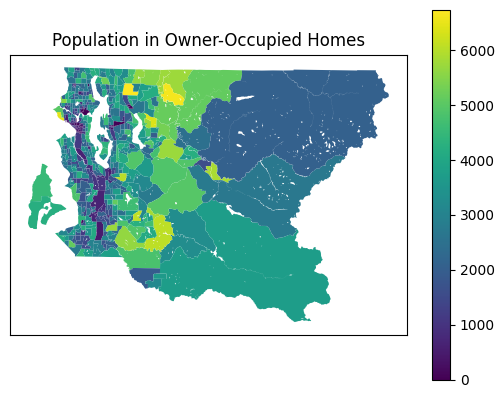

In [20]:
ax = cem.plot_map(
    gdf_king,
    "B25008_002E",
    legend=True,
)

_ = ax.set_title("Population in Owner-Occupied Homes")

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## But we want the percent of the population

We can just do the math in our data frame.

In [21]:
gdf_king["percent-owner-occupied"] = gdf_king["B25008_002E"] / gdf_king["B25008_001E"]

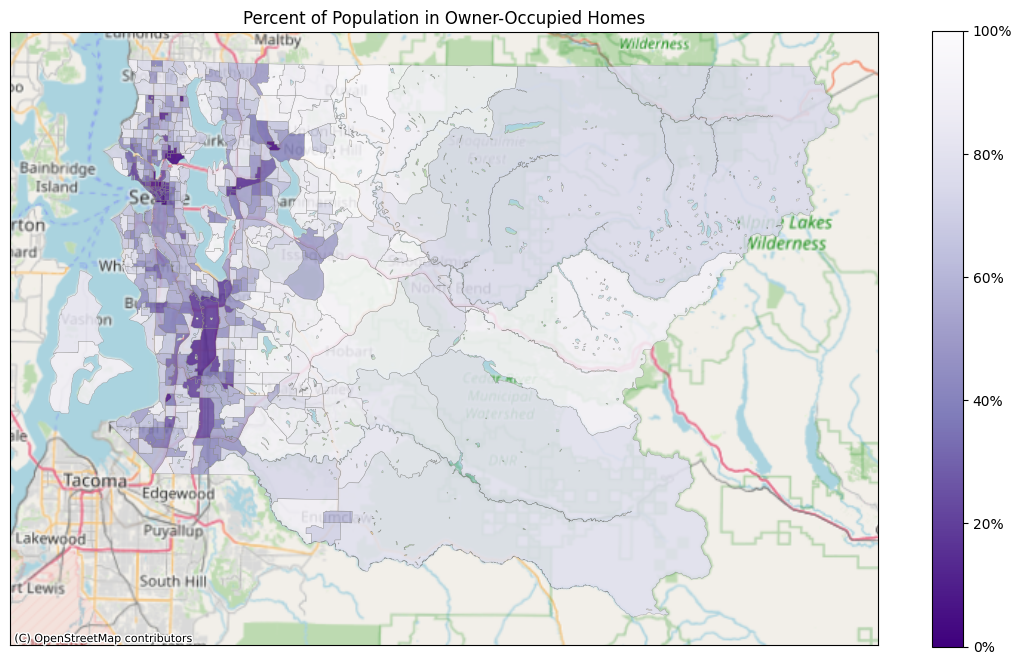

In [22]:
ax = cem.plot_map(
    gdf_king,
    "percent-owner-occupied",
    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"{100*x:.0f}%")},
    cmap="Purples_r",
    alpha=0.85,
    edgecolor="gray",
    linewidth=0.25,
    vmin=0,
    vmax=1.0,
    with_background=True,
    figsize=(14, 8),
)

_ = ax.set_title("Percent of Population in Owner-Occupied Homes")